In [10]:
from __future__ import division
import datetime as dt
from collections import OrderedDict
import sys, os
import dateutil.relativedelta as rd
import json
from pathlib import Path

import utm
import pandas as pd
import numpy as np
import shapely.geometry as sg
import shapely.ops as so

DIR = Path('..')
sys.path.append(str(DIR))

import gtfs_kit as gk

%load_ext autoreload
%autoreload 2

DATA_DIR = DIR/'data'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
path = DATA_DIR/'cairns_gtfs.zip'
feed = gk.read_gtfs(path, dist_units='km')


In [32]:
def geometrize_routes(feed, route_ids=None):
    """
    """
    if feed.shapes is None:
        return
    
    # Subset routes
    routes = feed.routes.copy()
    if route_ids is not None:
        routes = routes.loc[lambda x: x.route_id.isin(route_ids)].copy()
        
    # Subset shapes
    trips = feed.trips.merge(routes.filter(["route_id"]), how="right")
    shapes = feed.shapes.merge(trips, how="right")

    # Combine shape LineStrings within route and direction
    def combine_shapes(group):
        d = {}
        d["geometry"] = so.linemerge(group.geometry.tolist())
        return pd.Series(d)
    
    g = (
        gk.geometrize_shapes(shapes)
        .merge(trips)
        .filter(["route_id", "direction_id", "geometry"])
        .groupby(["route_id", "direction_id"])
        .apply(combine_shapes)
        .reset_index()
        .merge(routes)
    )

    return g
    
        

In [33]:
route_ids = feed.routes.route_id.values[:2]
%time routes_g = geometrize_routes(feed)

CPU times: user 1.67 s, sys: 12 ms, total: 1.68 s
Wall time: 1.68 s


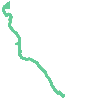

In [29]:
routes_g.geometry.iat[0]

In [ ]:
# Slicing 
display(fts.loc[:, ("num_trips", slice(None))])
display(fts.xs("num_trips", axis="columns"))

In [ ]:
f = fts = feed.compute_feed_time_series(trip_stats, dates[:1], freq="12H", split_route_types=False)
display(f)
g = gk.unstack_time_series(f)

# columns = [c for c in g.columns if c not in ["datetime", "value"]]
# h = g.pivot_table(index="datetime", columns=columns).value.sort_index(
#     axis="columns"
# )

# hours = (h.index[1] - h.index[0]).components.hours
# if hours != 0:
#     freqy = f"{hours}H"
# else:
#     freqy = "D"

# print(freqy)

h = gk.restack_time_series(g)
h

In [ ]:
f.index

In [ ]:
delta.components.hours

In [ ]:
feed1 = feed.copy()
cal = feed1.calendar.copy()
cal["monday"] = 0
feed1.calendar = cal
feed1.compute_feed_time_series(trip_stats, dates, freq="12H")

In [ ]:
s1 = pd.Series({"hello": 12, "goodbye": 13})
s2 = s1.copy()
pd.DataFrame([s1, s2])

In [ ]:
feed.compute_stop_stats(['20140601', '20140603'])

In [ ]:
trip_stats = feed.compute_trip_stats()
feed = feed.append_dist_to_stop_times(trip_stats)

# Load screen line
with (DATA_DIR/'cairns_screen_line.geojson').open() as src:
    line = json.load(src)
    line = sg.shape(line['features'][0]['geometry'])



In [ ]:
f = feed.compute_screen_line_counts(line, dates[:7])
f[f['crossing_time'] < '06:00:00']

In [ ]:
feed.compute_feed_time_series(ts, dates[-2:], freq='12H')

In [ ]:
sd = False
#%time p1 = proto1(feed, ts, dates[:14], split_directions=sd)
%time p2 = proto2(feed, [dates[0], '20010101'], split_directions=sd, freq='12H')
p2

In [ ]:
feed.compute_feed_stats(ts, dates[0])

In [ ]:
feed.describe()

In [ ]:
feed.summarize()